In [1]:
#import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import csv
import math
import seaborn as sns
from scipy import integrate

#set plot style
plt.style.use('seaborn-v0_8-whitegrid')
sns.set_palette('viridis')

#suppress warnings
import warnings
warnings.filterwarnings('ignore')

## 1. Load and Explore the Dataset

In [2]:
#load the dataset
Pi = []
filename = "π(x).csv"

with open(filename, mode='r') as file:
    reader = csv.reader(file)
    next(reader)  # Skip header
    for row in reader:
        number_of_primes = int(row[1])  # the second column contains the number of primes below x
        Pi.append(number_of_primes)

# create data frame
df = pd.DataFrame({
    "x": [i + 1 for i in range(0, 100000)],  
    "pi_x": [Pi[i] for i in range(0, 100000)]
})

#display first few rows
print("Dataset Preview:")
print(df.head(10))

#print out dataset statistics
print("\nDataset Statistics:")
print(df.describe())

Dataset Preview:
    x  pi_x
0   1     0
1   2     1
2   3     2
3   4     2
4   5     3
5   6     3
6   7     4
7   8     4
8   9     4
9  10     4

Dataset Statistics:
                   x           pi_x
count  100000.000000  100000.000000
mean    50000.500000    5048.130550
std     28867.657797    2706.399676
min         1.000000       0.000000
25%     25000.750000    2762.000000
50%     50000.500000    5133.000000
75%     75000.250000    7393.000000
max    100000.000000    9592.000000


## 2. Visualisation of Prime Counting Function

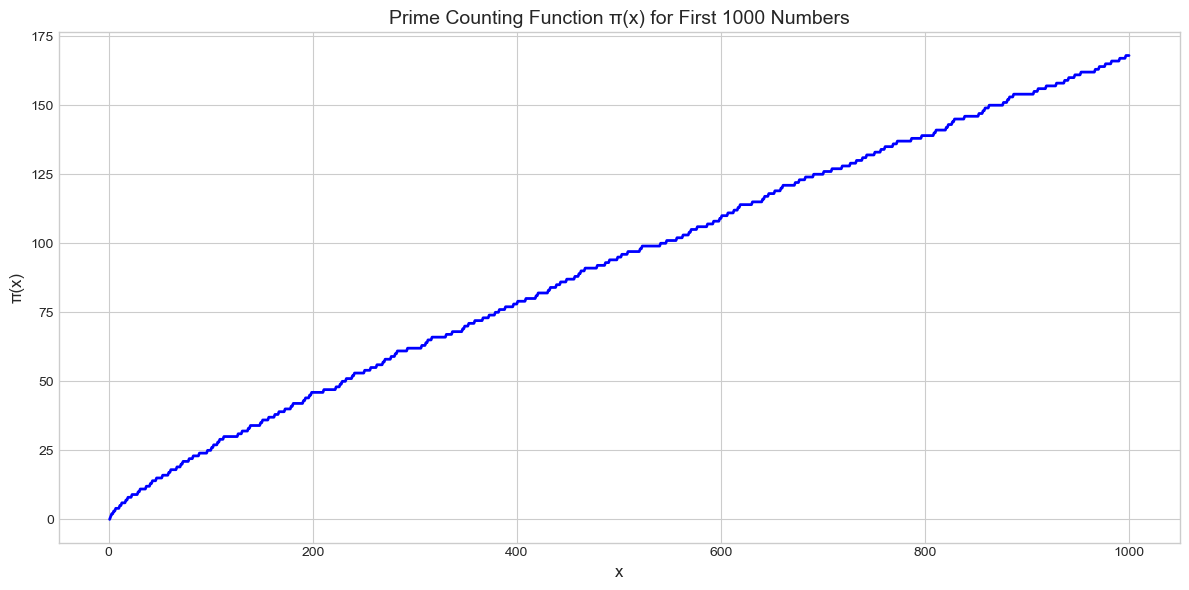

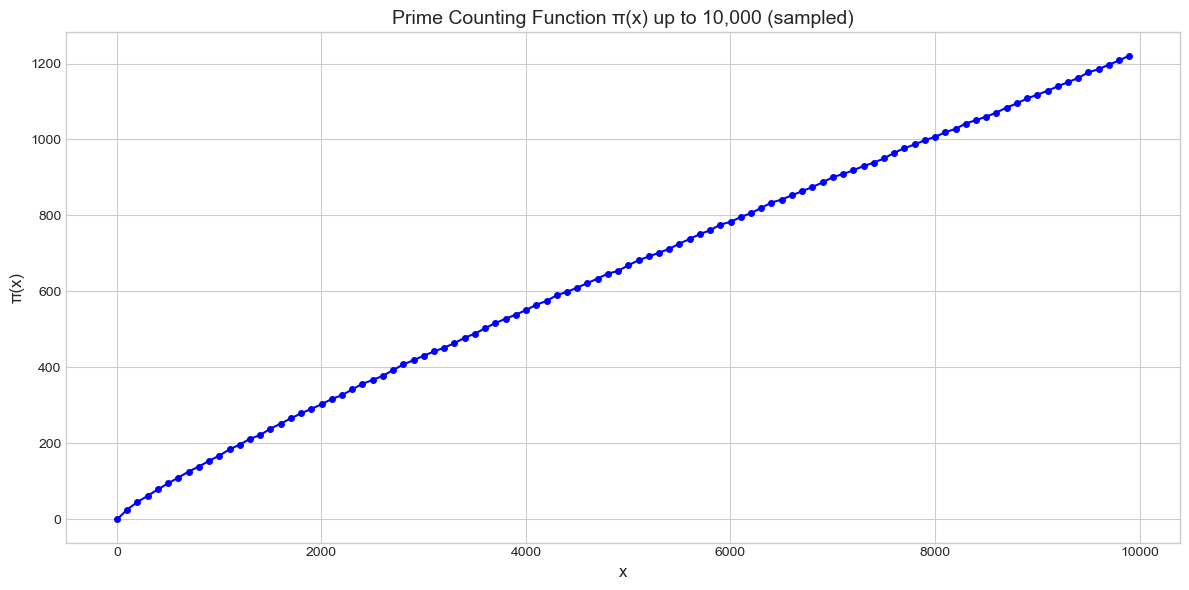

In [3]:
#visualise the prime counting function
plt.figure(figsize=(12, 6))
plt.plot(df['x'][:1000], df['pi_x'][:1000], 'b-', linewidth=2)
plt.xlabel('x', fontsize=12)
plt.ylabel('π(x)', fontsize=12)
plt.title('Prime Counting Function π(x) for First 1000 Numbers', fontsize=14)
plt.grid(True)
plt.tight_layout()
plt.show()

#visualise the relationship on a larger scale
plt.figure(figsize=(12, 6))
plt.plot(df['x'][:10000:100], df['pi_x'][:10000:100], 'bo-', markersize=4)
plt.xlabel('x', fontsize=12)
plt.ylabel('π(x)', fontsize=12)
plt.title('Prime Counting Function π(x) up to 10,000 (sampled)', fontsize=14)
plt.grid(True)
plt.tight_layout()
plt.show()

### It can be seen that the graph of prime counting function is mostly linear. Hence, I have decided to apply linear regression techniques to approximate the function.